# Indonesian Review Analysis

In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [24]:
# Function


In [54]:
train_path = '../integrated_datasets/tripadvisor_datasets/502.AttractionId/train.csv'
test_path = '../integrated_datasets/tripadvisor_datasets/502.AttractionId/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
data = pd.concat([train, test])

In [26]:
def clean_data(data):
    result = [x.replace('\n','').replace('...','').replace('..','').replace('yg','yang').strip().lower() for x in data]
    return result

In [27]:
train_review = clean_data(train.comment.unique())
print('train:', train_review[:5])

train: ['tempat yang sakral sekali dibali setelah pura uluwatu belom lengkap kebali kalau belum kesini, meski lokasi lumayan jauh tp lokasi ini pelengkap kalau kebali', 'ini tempat taman wisata air paling lengkap di bali.', 'salah satu pantai terbaik di bali, di mana anda dapat bergaul dengan keluarga anda. walaupun sebagian besar hotel tidak memiliki kursi pribadi yang disediakan untuk tamu mereka. tapi masih anda dapat berjalan di sekitar sana. tempat yang bagus dan kami menghabiskan hampir sepanjang hari. anda juga dapat melakukan laut di sana.', 'kami mencintai hari kami di kebun binatang bali! itu jauh lebih baik daripada yang saya bayangkan. saya putra berusia 4 tahun itu adalah hari terbaik. kami membeli tiket kebun binatang dasar yang mencakup hutan miniapolis waterplay. ini adalah lebih dari cukup untuk mendapatkan. aku tidak menyadari bahwa anda tidak dapat membawa makanan ke kebun binatang yang ada sebagai istri saya makanan dan minuman di dalam kebun binatang sangat baik ha

In [28]:
test_review = clean_data(test.comment.unique())
print('test:', test_review[:5])

test: ['saya tidak yakin apa yang lebih menyenangkan di tempat ini - pemandangan atau kachak bertari keduanya merupakan hal-hal yang anda harus melihat ketika di bali! tarian ini menjadi hanya 1 jam-bermain, sinopsis semua pararasul tersedia dalam bahasa inggris, dan harus jujur tanpa itu, itu adalah sangat sulit untuk bayangan tersebut.', 'tirta empul merupakan salah satu pura dengan tempat "pengelukatan" (pembersihan diri / purification bath) terbaik dan favorit kami di bali. penyucian diri melalui mandi di bawah guyuran air pancuran kemudian melakukan persembahyangan di pura tirta empul memberikan ketenangan jiwa setelahnya.', 'tempat  ini sangat  cantik sekali dengan memberikan  pemandangan  yang indah dan menyejukan matadan sangat  luas nyaman', 'pantai-pantai di daerah nusa dua menyajikan pemandangan yang indah dan juga laut yang biru. cocok untuk bersantai bersama teman dan keluarga!', "aku baik-baik dengan hewan di hutan monyet, tetapi tidak tempat yang luar biasa untuk mengunj

In [29]:
data_review = train_review + test_review
# print('data:', data[:5])
print(len(data_review), len(train_review), len(test_review))

2074 1662 412


In [30]:
# EDA QUESTION
# 1. What is the average number of sentences per review?
# 2. What is the average number of words per review?


## 1. What is the average number of sentences per review?

In [31]:
# raw data_review no preprocessing
def get_average_number_of_sentence(data):
    length_sentences = []
    for review in data:
        sentences = review.split('.')
        length_sentences.append(len(sentences))

    result = sum(length_sentences)/len(length_sentences)
    message = f'average_number_of_sentences: {round(result, 2)}'
    print(message)
    return length_sentences

In [32]:
average_number_of_sentences = get_average_number_of_sentence(data_review)

average_number_of_sentences: 3.55


## 2. What is the average number of words per review?

In [33]:
# raw data_review no preprocessing
def get_average_number_of_words(data):
    length_sentences = []
    for review in data:
        words = review.split(' ')
        length_sentences.append(len(words))

    result = sum(length_sentences)/len(length_sentences)
    message = f'average_number_of_words_per_review: {round(result, 2)}'
    print(message)
    return length_sentences

In [34]:
average_number_of_words_per_review = get_average_number_of_words(data_review)

average_number_of_words_per_review: 40.77


## 3. Analyze the distribution of the two params

Text(0.5, 1.0, 'Distribution of sentences per review')

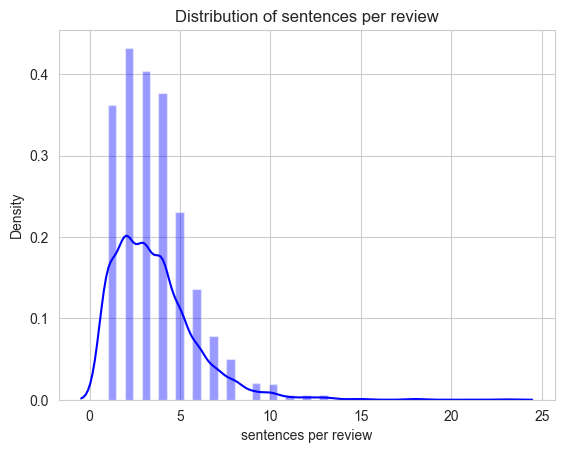

In [35]:
# Visualize the distribution
g = sns.distplot(average_number_of_sentences, color='blue', axlabel='sentences per review')
g.set_title('Distribution of sentences per review')

Text(0.5, 1.0, 'Distribution of words per review')

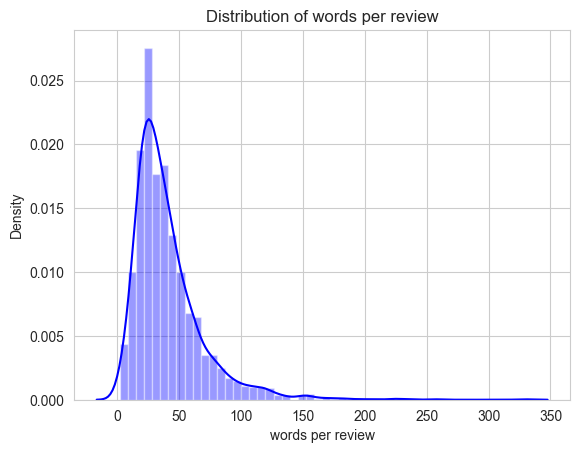

In [36]:
# visualize the distribution
g = sns.distplot(average_number_of_words_per_review, color='blue', axlabel='words per review')
g.set_title('Distribution of words per review')

## 3. Analyze the boxplot of the two params

Text(0.5, 1.0, 'Boxplot of sentences per review')

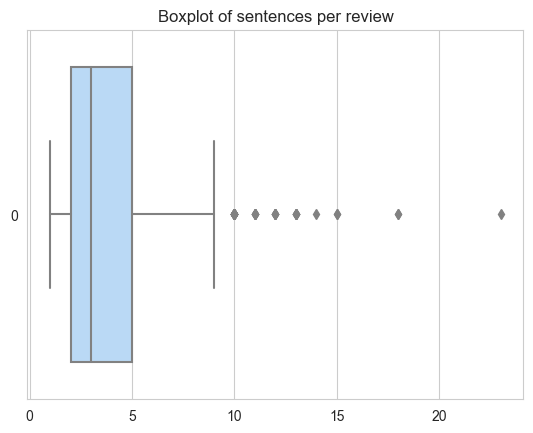

In [37]:
g = sns.boxplot(average_number_of_sentences, color='#B0DAFF', orient='h')
g.set_title('Boxplot of sentences per review')

Text(0.5, 1.0, 'Boxplot of words per review')

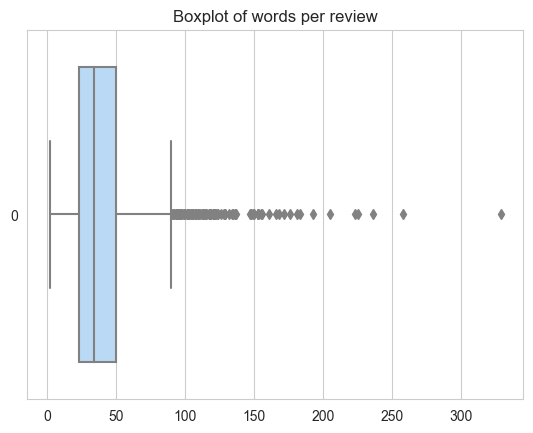

In [38]:
g = sns.boxplot(average_number_of_words_per_review, color='#B0DAFF', orient='h')
g.set_title('Boxplot of words per review')


### How if we removing the ourlier?

In [39]:
# try to remove outlier
def remove_outlier(data):
    Q1 = np.percentile(data, 25, interpolation='midpoint')
    Q3 = np.percentile(data, 75, interpolation='midpoint')
    IQR = Q3 - Q1
    print('Q1:', Q1)
    print('Q3:', Q3)
    print('IQR:', IQR)
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    print('lower_bound:', lower_bound)
    print('upper_bound:', upper_bound)
    result = [x for x in data if x > lower_bound and x < upper_bound]
    return result


Q1: 2.0
Q3: 5.0
IQR: 3.0
lower_bound: -2.5
upper_bound: 9.5


Text(0.5, 1.0, 'Boxplot of sentences per review without outlier')

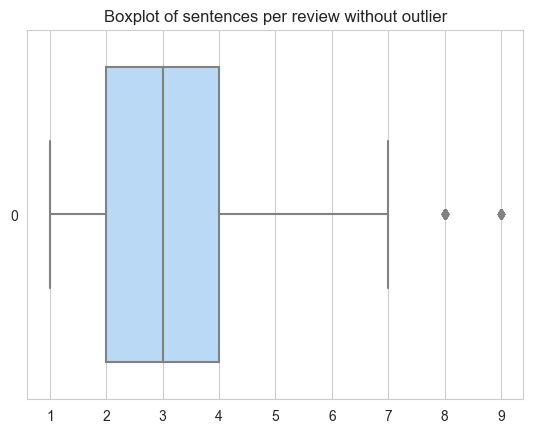

In [40]:
average_number_of_sentences_no_outlier = remove_outlier(average_number_of_sentences)

# visualise with boxplot
g = sns.boxplot(average_number_of_sentences_no_outlier, color='#B0DAFF', orient='h')
g.set_title('Boxplot of sentences per review without outlier')

Text(0.5, 1.0, 'Distribution of sentences per review without outlier')

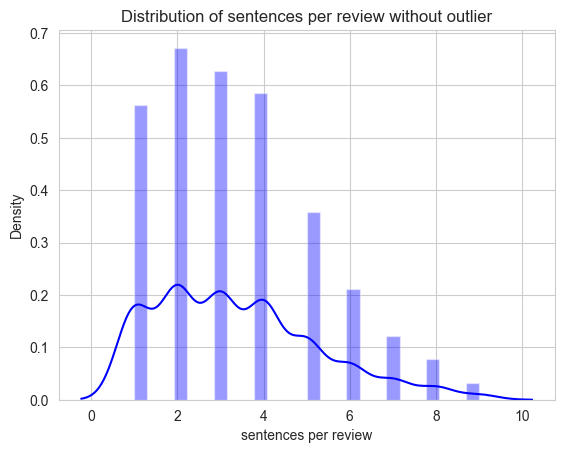

In [41]:
# visualize the distribution
g = sns.distplot(average_number_of_sentences_no_outlier, color='blue', axlabel='sentences per review')
g.set_title('Distribution of sentences per review without outlier')

Q1: 23.0
Q3: 50.0
IQR: 27.0
lower_bound: -17.5
upper_bound: 90.5


Text(0.5, 1.0, 'Boxplot of words per review without outlier')

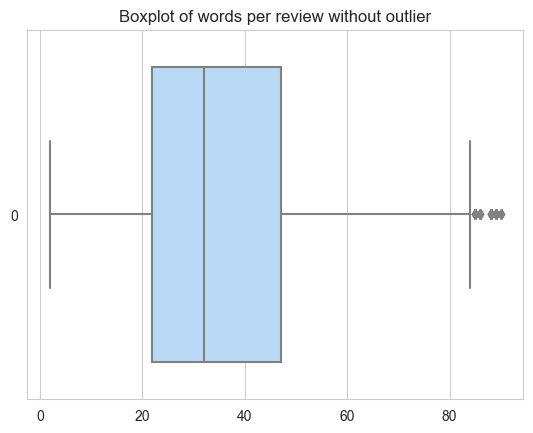

In [42]:
average_number_of_words_per_review_no_outlier = remove_outlier(average_number_of_words_per_review)

#visualise with boxplot
g = sns.boxplot(average_number_of_words_per_review_no_outlier, color='#B0DAFF', orient='h')
g.set_title('Boxplot of words per review without outlier')


Text(0.5, 1.0, 'Distribution of words per review without outlier')

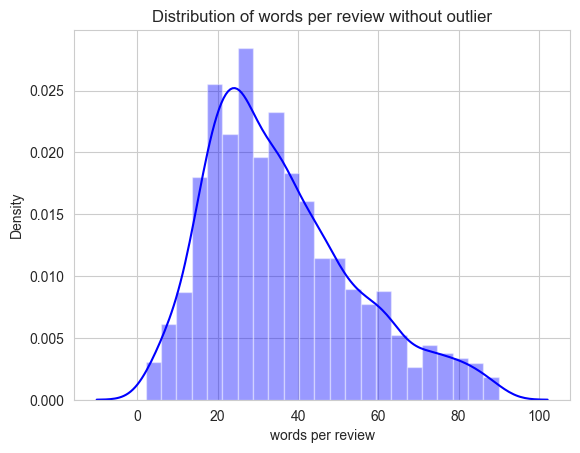

In [43]:
# visualize the distribution
g = sns.distplot(average_number_of_words_per_review_no_outlier, color='blue', axlabel='words per review')
g.set_title('Distribution of words per review without outlier')

## 4. Analyze the wordcloud

### 4.1 Wordcloud of the whole dataset

In [44]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(data_review))

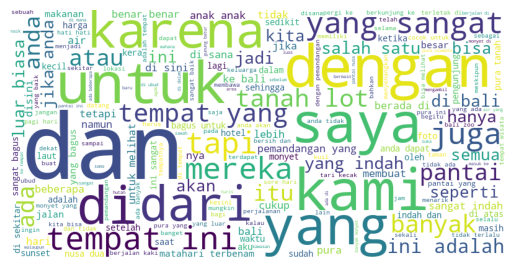

In [45]:
# plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Too massy, let's do some preprocessing

In [46]:
# remove punctuation using regex
def remove_punctuation(data):
    result = []
    for s in data:
        clean_sentence = re.sub(r'[^\w\s]','',s)
        result.append(clean_sentence.strip())
    return result


In [47]:
data_remove_punctuation = remove_punctuation(data_review)

In [48]:
# remove stopwords using nltk
# !pip install nltk

def remove_stopwords(data_review, lang='indonesian'):    # download the stopwords
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stopwords = stopwords.words(lang)

    result = []
    for s in data_review:
        clean_sentence = ''
        words = s.split(' ')
        for word in words:
            if word not in stopwords:
                clean_sentence += word + ' '
        result.append(clean_sentence.strip())
    return result

In [49]:
data_remove_stopwords = remove_stopwords(data_remove_punctuation)
data_remove_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sakral dibali pura uluwatu belom lengkap kebali kesini lokasi lumayan tp lokasi pelengkap kebali',
 'taman wisata air lengkap bali',
 'salah pantai terbaik bali bergaul keluarga hotel memiliki kursi pribadi disediakan tamu berjalan bagus menghabiskan laut',
 'mencintai kebun binatang bali bayangkan putra berusia 4 terbaik membeli tiket kebun binatang dasar mencakup hutan miniapolis waterplay menyadari membawa makanan kebun binatang istri makanan minuman kebun binatang harga kebun binatang indah bersih hewan kesempatan anakanak makan hewan kebun binatang mengambil kuda murah pikir idr25 000 makan hewanhewan benarbenar idr30 000 menghabiskan hutan miniapolis waterplay anak bagus bersih aman kegembiraan staf ramah membantu kebun binatang bali benarbenar layak dikunjungi kebun binatang benarbenar memiliki anakanak pikir kebun binatang keluarga muda anakanak orang tua menyukai',
 'kali benarbenar menikmati membeli tiket salah jalan penjual simpanan sebingkah 5 pintu menemukan loker memper

In [50]:
def get_mask_from_image():
    mask = np.array(Image.open('..\\bali-island.jpg'))
    return mask

# A similar function, but using the mask
def generate_better_wordcloud(corpus, title, stopwords=None):
    cloud = WordCloud(scale=3,
                      # max_words=150,
                      mask= get_mask_from_image(),
                      # colormap='Blues',
                      background_color='white',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(corpus)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

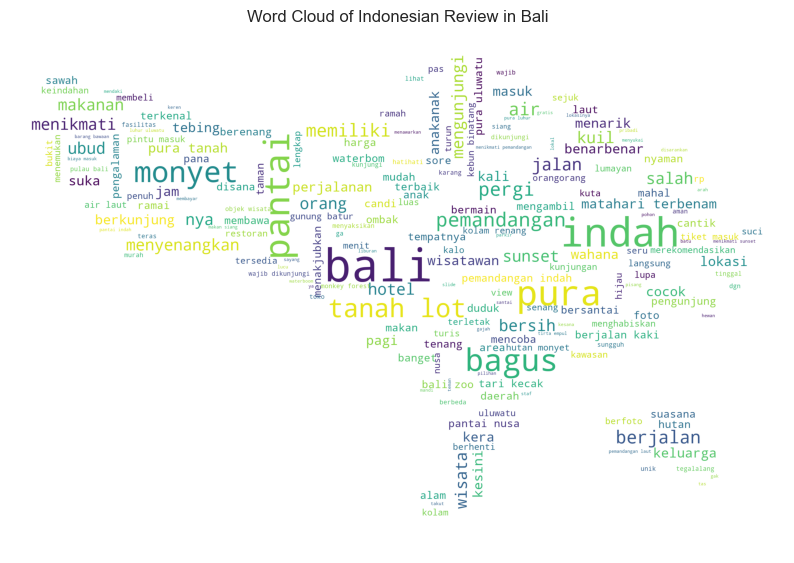

In [52]:
# use the function to create a wordcloud
generate_better_wordcloud(' '.join(data_remove_stopwords), 'Word Cloud of Indonesian Review in Bali')

[Text(0, 0, '709'),
 Text(0, 0, '594'),
 Text(0, 0, '578'),
 Text(0, 0, '506'),
 Text(0, 0, '487'),
 Text(0, 0, '423'),
 Text(0, 0, '373'),
 Text(0, 0, '373'),
 Text(0, 0, '285'),
 Text(0, 0, '270')]

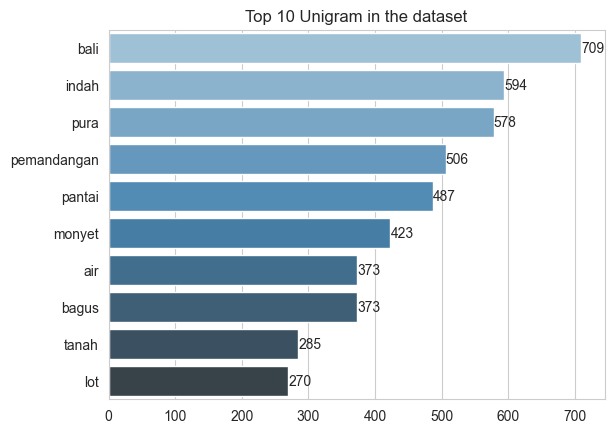

In [460]:
# visualize the wordcloud using barplot
#count the frequency of each word
from collections import Counter
word_freq = Counter(' '.join(data_remove_stopwords).split(' '))

#create df to sort values
import pandas as pd
df = pd.DataFrame.from_dict(word_freq, orient='index').reset_index()
df.columns = ['word', 'freq']
df = df.sort_values(by='freq', ascending=False)

# remove row 213 cause has empty string
df = df.drop(213)

# visualize the wordcloud using bar-plot
x,y = map(list, zip(*df.head(10).values))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 Unigram in the dataset')
g.bar_label(g.containers[0], label_type='edge',)

### Bigram Wordcloud

In [461]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
def get_top_topic_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words=list(STOPWORDS)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

[Text(0, 0, '267'),
 Text(0, 0, '124'),
 Text(0, 0, '102'),
 Text(0, 0, '95'),
 Text(0, 0, '82'),
 Text(0, 0, '74'),
 Text(0, 0, '59'),
 Text(0, 0, '57'),
 Text(0, 0, '57'),
 Text(0, 0, '55')]

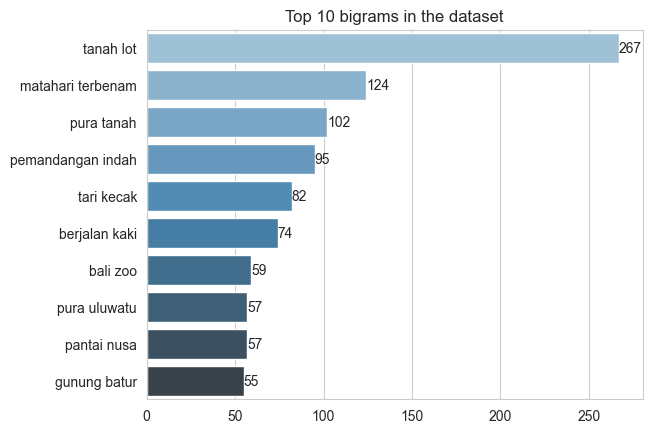

In [463]:
top_topic_bigrams = get_top_topic_bigrams(data_remove_stopwords, n=10)
x,y = map(list, zip(*top_topic_bigrams))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 bigrams in the dataset')
g.bar_label(g.containers[0], label_type='edge',)

### Trigram Wordcloud

In [86]:
def get_top_topic_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words=list(STOPWORDS)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

[Text(0, 0, '101'),
 Text(0, 0, '27'),
 Text(0, 0, '22'),
 Text(0, 0, '20'),
 Text(0, 0, '18'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '12')]

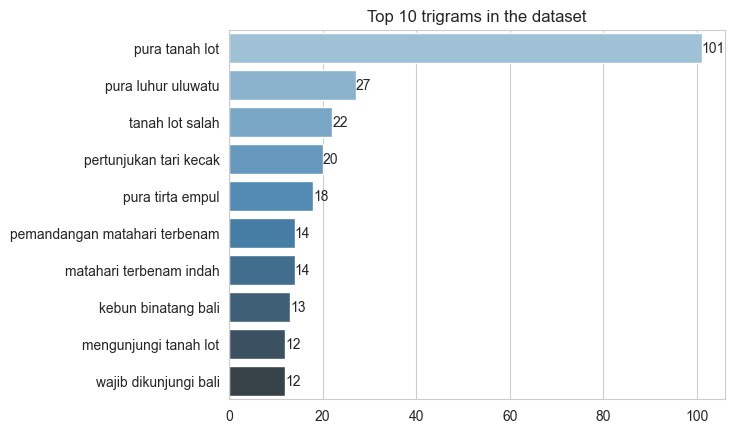

In [465]:
top_topic_trigrams = get_top_topic_trigrams(data_remove_stopwords, n=10)
x,y = map(list, zip(*top_topic_trigrams))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 trigrams in the dataset')
g.bar_label(g.containers[0], label_type='edge')

## 5. Analyze the sentiment

In [466]:
data

,review_id,comment,aspects,labels,start,end
0,00155dad58342ea731dfbc04098cf097,tempat yang sakral sekali dibali setelah pura ...,tempat,Neutral,0,6
1,00155dad58342ea731dfbc04098cf097,tempat yang sakral sekali dibali setelah pura ...,lokasi,Negative,103,109
2,00155dad58342ea731dfbc04098cf097,tempat yang sakral sekali dibali setelah pura ...,lokasi,Positive,126,132
3,003bcff8334521875c40c4c48ced2c53,ini tempat taman wisata air paling lengkap di ...,taman wisata air,Positive,11,27
4,003eab42bcd1603e83cac4f647622529,"salah satu pantai terbaik di bali, di mana and...",pantai,Positive,11,17
...,...,...,...,...,...,...
1724,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,model slide,Positive,188,199
1725,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,crew,Positive,201,205
1726,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,fasilitas,Positive,254,263
1727,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,makanan,Positive,284,291


[Text(0, 0, '5738'), Text(0, 0, '1986'), Text(0, 0, '936')]

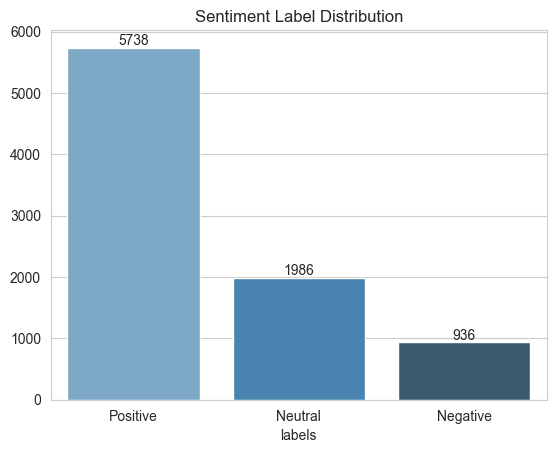

In [467]:
# count the sentiment label
sentiment_label = data['labels'].value_counts()

# visualize the sentiment label
g = sns.barplot(x=sentiment_label.index, y=sentiment_label.values, palette='Blues_d')
g.set_title('Sentiment Label Distribution')
g.bar_label(g.containers[0], label_type='edge')

## 6. Analyze the aspect

In [57]:
data

,review_id,comment,aspects,labels,start,end
0,00155dad58342ea731dfbc04098cf097,tempat yang sakral sekali dibali setelah pura ...,tempat,Neutral,0,6
1,00155dad58342ea731dfbc04098cf097,tempat yang sakral sekali dibali setelah pura ...,lokasi,Negative,103,109
2,00155dad58342ea731dfbc04098cf097,tempat yang sakral sekali dibali setelah pura ...,lokasi,Positive,126,132
3,003bcff8334521875c40c4c48ced2c53,ini tempat taman wisata air paling lengkap di ...,taman wisata air,Positive,11,27
4,003eab42bcd1603e83cac4f647622529,"salah satu pantai terbaik di bali, di mana and...",pantai,Positive,11,17
...,...,...,...,...,...,...
1724,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,model slide,Positive,188,199
1725,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,crew,Positive,201,205
1726,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,fasilitas,Positive,254,263
1727,b1027edae7c857cf38e94c2b269ed8d3,libur lebaran kemarin kami bermain di waterboo...,makanan,Positive,284,291


[Text(0, 0, '490'),
 Text(0, 0, '397'),
 Text(0, 0, '311'),
 Text(0, 0, '211'),
 Text(0, 0, '210'),
 Text(0, 0, '150'),
 Text(0, 0, '128'),
 Text(0, 0, '120'),
 Text(0, 0, '104'),
 Text(0, 0, '92')]

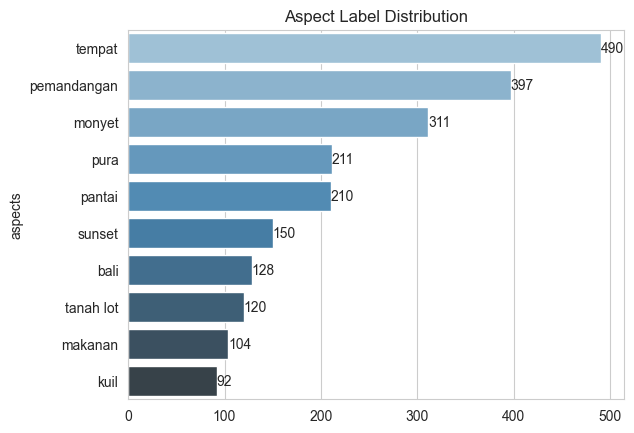

In [69]:
# count the aspect label
aspect_label = data['aspects'].value_counts().head(10)

# visualize the aspect label
g = sns.barplot(x=aspect_label.values, y=aspect_label.index, palette='Blues_d')
g.set_title('Aspect Label Distribution')
g.bar_label(g.containers[0], label_type='edge')

# English Review Analysis

In [70]:
train_path = '../integrated_datasets/apc_datasets/500.Tripadvisor/505.attraction_en/train.tourism_review_en.txt.apc.inference'
test_path = '../integrated_datasets/apc_datasets/500.Tripadvisor/505.attraction_en/test.tourism_review_en.txt.apc.inference'
review_train_path = '../integrated_datasets/apc_datasets/500.Tripadvisor/505.attraction_en/train.tourism_review_en.txt'
review_test_path = '../integrated_datasets/apc_datasets/500.Tripadvisor/505.attraction_en/test.tourism_review_en.txt'

In [75]:
# read the train data
with open(train_path, 'r', encoding='utf-8') as fopen:
    train_data = fopen.readlines()

# read the test data
with open(test_path, 'r', encoding='utf-8') as fopen:
    test_data = fopen.readlines()

# concat the train and test data
data = train_data + test_data
labels = [x.split('$LABEL$')[-1].replace('\n','').strip() for x in data]
aspect = [x.split('[B-ASP]')[-1].split('[E-ASP]')[0].strip() for x in data]

In [77]:
# read the review train data
with open(review_train_path, 'r', encoding='utf-8') as fopen:
    review_train_data = fopen.readlines()

# read the review test data
with open(review_test_path, 'r', encoding='utf-8') as fopen:
    review_test_data = fopen.readlines()

# concat the review train and test data
review_data = review_train_data + review_test_data
review_data = [x.replace('\n','').strip() for x in review_data]

In [73]:
print('Number of data: ', len(review_data))

Number of data:  3000


In [78]:
review_data[:5]

["We found that the rice fields were serene and beautiful. It takes 4 months from planting to harvest, which is all done by hand. The purpose of the terraces is to ensure that water flows down to all levels. We didn't walk through the terraces, we only viewed from a distance and that still left us entranced",
 "I guess the gorgeous scenery and the landscape has already been described by almost every reviewer here so I won't go into it again.",
 "Try to reach her at 9 a.m. and try to stay still the last minute i.e 5.30 pm. Because I do not want to miss even a single minute of fun in this place. I've been to theme parks which has attractions spread all over the place but here all the attractions are built very closer to each other and easy to access other attractions without walking a Long way.",
 'its a small thing to do..but its bali..do it, it needs to be done.  Its beautiful and amazing....enjoy a piece of paradise.',
 'love this place. its worth a visit. they will steal water bottle

## 1. What is average number of sentence in english review?

In [12]:
# average_number_of_sentence in english review
average_number_of_sentence = get_average_number_of_sentence(review_data)

average_number_of_sentences: 4.59


## 2. What is average number of word in english review?

In [13]:
# average_number_of_word in english review
average_number_of_word = get_average_number_of_words(review_data)

average_number_of_words_per_review: 53.14


## 3. Analyze the distribution

Text(0.5, 1.0, 'Distribution of sentences per review')

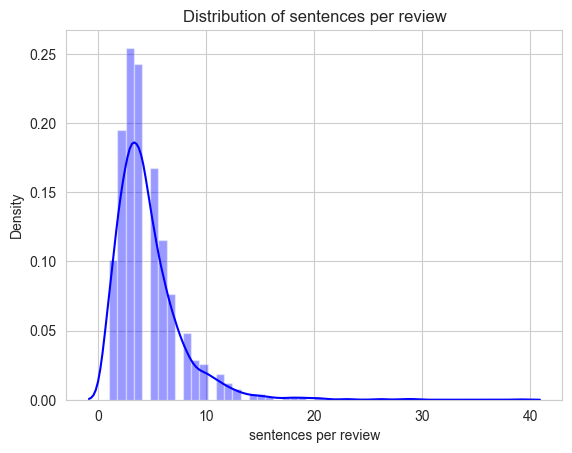

In [17]:
# Visualize the distribution
g = sns.distplot(average_number_of_sentence, color='blue', axlabel='sentences per review')
g.set_title('Distribution of sentences per review')

Text(0.5, 1.0, 'Distribution of words per review')

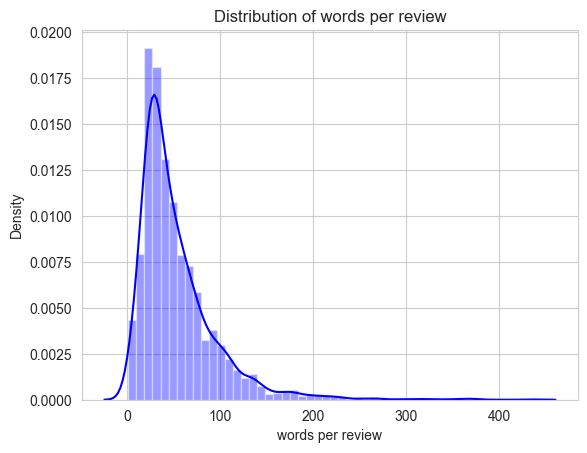

In [18]:
# Visualize the distribution
g = sns.distplot(average_number_of_word, color='blue', axlabel='words per review')
g.set_title('Distribution of words per review')

Text(0.5, 1.0, 'Boxplot of sentences per review')

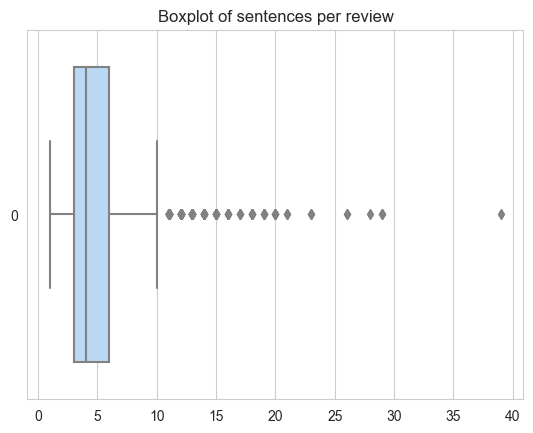

In [20]:
# boxplot the number of sentences
g = sns.boxplot(average_number_of_sentence, orient='h', color='#B0DAFF')
g.set_title('Boxplot of sentences per review')

Text(0.5, 1.0, 'Boxplot of words per review')

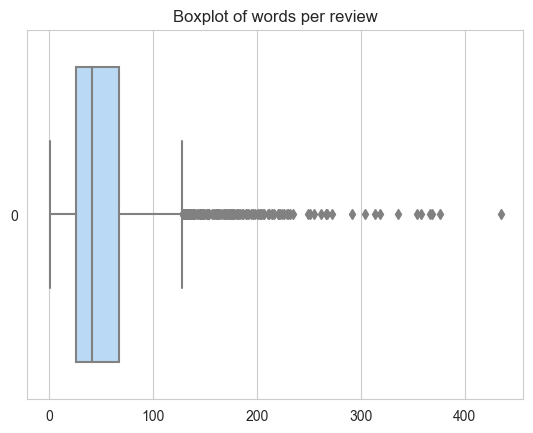

In [21]:
#boxplot the number of words
g = sns.boxplot(average_number_of_word, orient='h', color='#B0DAFF')
g.set_title('Boxplot of words per review')

### How if we do remove outlier?

Q1: 3.0
Q3: 6.0
IQR: 3.0
lower_bound: -1.5
upper_bound: 10.5


Text(0.5, 1.0, 'Distribution of sentences per review without outlier')

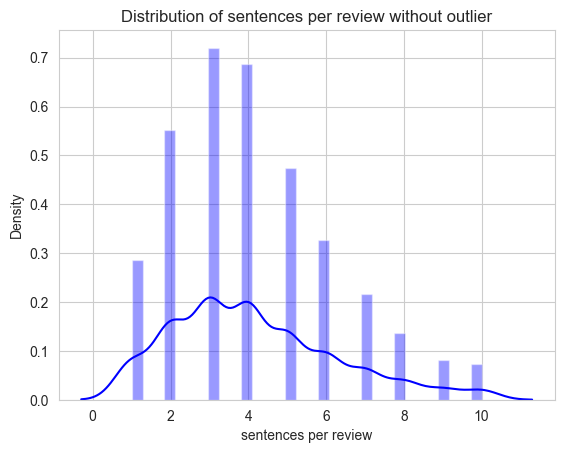

In [32]:
number_of_sentence_without_outlier = remove_outlier(average_number_of_sentence)

# Visualize the distribution
g = sns.distplot(number_of_sentence_without_outlier, color='blue', axlabel='sentences per review')
g.set_title('Distribution of sentences per review without outlier')

Text(0.5, 1.0, 'Boxplot of sentences per review without outlier')

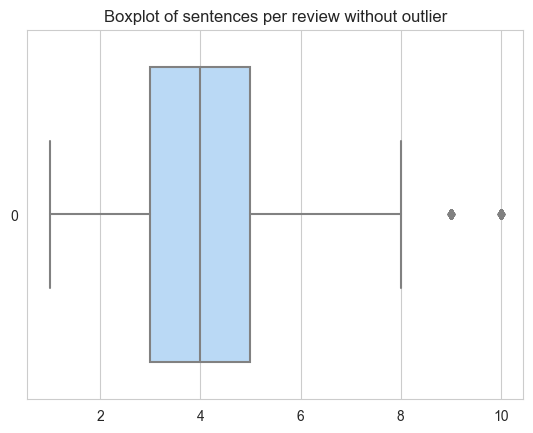

In [33]:
# boxplot the number of sentences
g = sns.boxplot(number_of_sentence_without_outlier, orient='h', color='#B0DAFF')
g.set_title('Boxplot of sentences per review without outlier')

Q1: 26.0
Q3: 67.0
IQR: 41.0
lower_bound: -35.5
upper_bound: 128.5


Text(0.5, 1.0, 'Distribution of words per review without outlier')

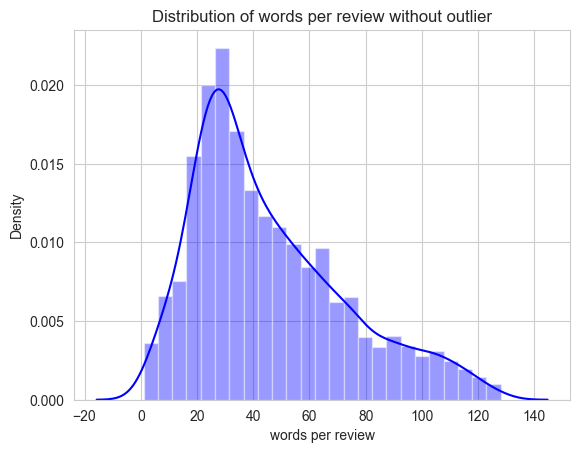

In [34]:
# number of words without outlier
number_of_word_without_outlier = remove_outlier(average_number_of_word)

# Visualize the distribution
g = sns.distplot(number_of_word_without_outlier, color='blue', axlabel='words per review')
g.set_title('Distribution of words per review without outlier')


Text(0.5, 1.0, 'Boxplot of words per review without outlier')

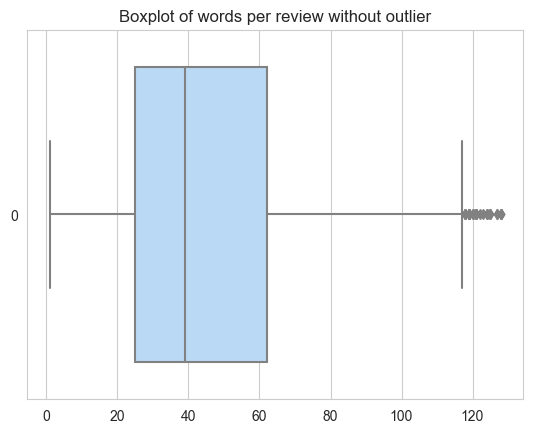

In [35]:
# boxplot the number of words
g = sns.boxplot(number_of_word_without_outlier, orient='h', color='#B0DAFF')
g.set_title('Boxplot of words per review without outlier')

## 4. Analyze the wordcloud

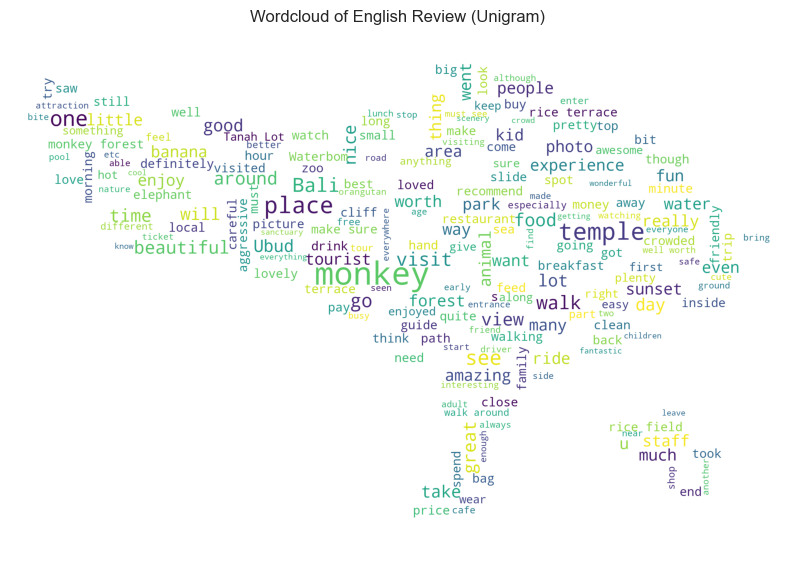

In [63]:
# get the wordcloud
generate_better_wordcloud(''.join(review_data), title='Wordcloud of English Review (Unigram)')

#### how if we do remove punctuation and stopwords?

In [64]:
review_remove_punctuation = remove_punctuation(review_data)

In [68]:
review_remove_stopwords = remove_stopwords(review_remove_punctuation, 'english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


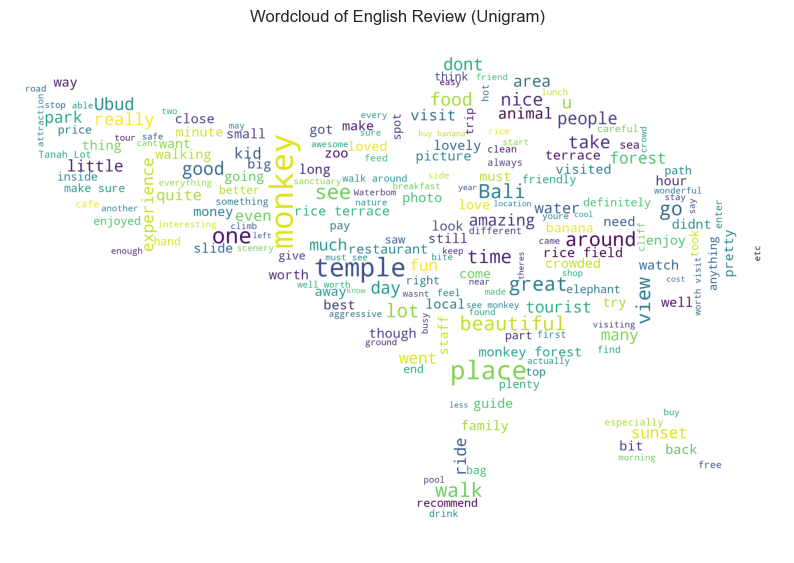

In [70]:
generate_better_wordcloud(''.join(review_remove_stopwords), title='Wordcloud of English Review (Unigram)')

In [71]:
def get_top_topic_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

[Text(0, 0, '1405'),
 Text(0, 0, '1163'),
 Text(0, 0, '856'),
 Text(0, 0, '839'),
 Text(0, 0, '716'),
 Text(0, 0, '689'),
 Text(0, 0, '620'),
 Text(0, 0, '611'),
 Text(0, 0, '605'),
 Text(0, 0, '584')]

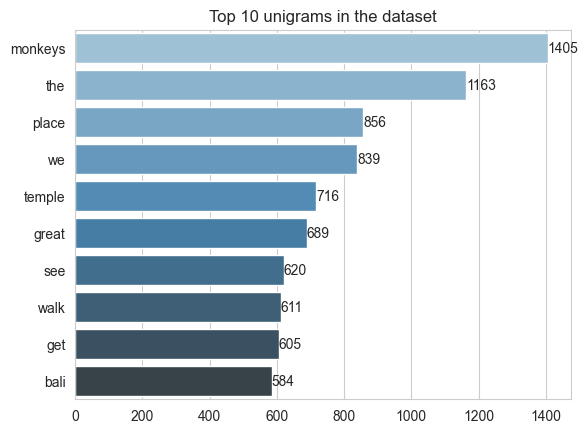

In [74]:
top_topic_unigrams = get_top_topic_unigrams(review_remove_stopwords, n=10)
x,y = map(list, zip(*top_topic_unigrams))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 unigrams in the dataset')
g.bar_label(g.containers[0], label_type='edge')

### bigram

[Text(0, 0, '186'),
 Text(0, 0, '103'),
 Text(0, 0, '99'),
 Text(0, 0, '98'),
 Text(0, 0, '95'),
 Text(0, 0, '90'),
 Text(0, 0, '87'),
 Text(0, 0, '79'),
 Text(0, 0, '74'),
 Text(0, 0, '70')]

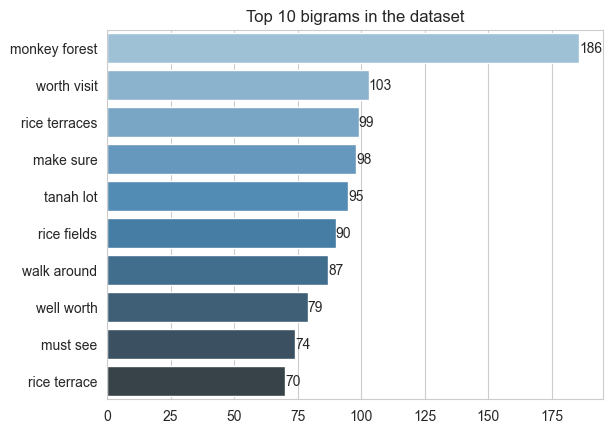

In [85]:
top_topic_bigrams = get_top_topic_bigrams(review_remove_stopwords, n=10)
x,y = map(list, zip(*top_topic_bigrams))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 bigrams in the dataset')
g.bar_label(g.containers[0], label_type='edge')

### trigram

[Text(0, 0, '29'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13')]

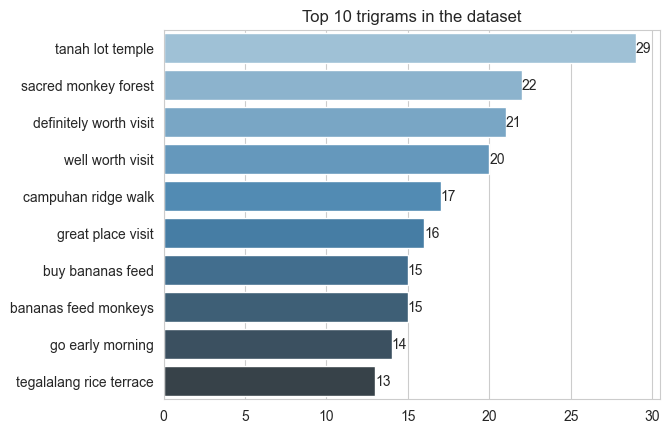

In [87]:
top_topic_trigrams = get_top_topic_trigrams(review_remove_stopwords, n=10)
x,y = map(list, zip(*top_topic_trigrams))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 trigrams in the dataset')
g.bar_label(g.containers[0], label_type='edge')

## 5. Analyze the sentiment

In [92]:
# counter import
from collections import Counter

In [95]:
# count the labels
def count_labels(labels):
    labels_count = Counter(labels)
    labels_count = dict(labels_count)
    return labels_count

labels_count = count_labels(labels)

[Text(0, 0, '3813'), Text(0, 0, '695'), Text(0, 0, '784')]

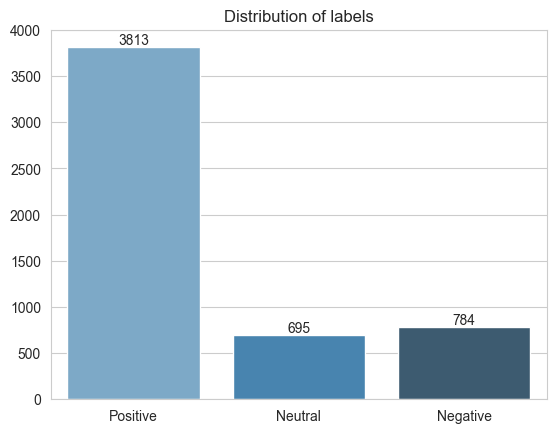

In [96]:
# visualize the labels
g = sns.barplot(x=list(labels_count.keys()), y=list(labels_count.values()), palette='Blues_d')
g.set_title('Distribution of labels')
g.bar_label(g.containers[0], label_type='edge')

## 6. Analyze the aspect

In [99]:
def get_top_aspect(data, n=None):
    aspect = Counter(data)
    aspect = dict(aspect)
    aspect = sorted(aspect.items(), key=lambda x: x[1], reverse=True)
    return aspect[:n]

[Text(0, 0, '524'),
 Text(0, 0, '388'),
 Text(0, 0, '213'),
 Text(0, 0, '194'),
 Text(0, 0, '153'),
 Text(0, 0, '141'),
 Text(0, 0, '95'),
 Text(0, 0, '84'),
 Text(0, 0, '75'),
 Text(0, 0, '74')]

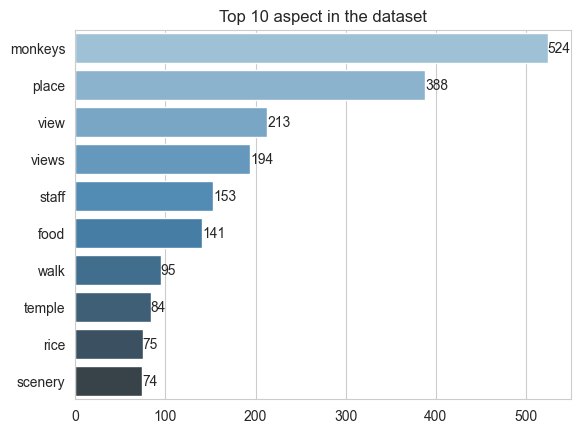

In [101]:
top_aspect = get_top_aspect(aspect, n=10)
x,y = map(list, zip(*top_aspect))
g = sns.barplot(x=y, y=x, palette='Blues_d')
g.set_title('Top 10 aspect in the dataset')
g.bar_label(g.containers[0], label_type='edge')